In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Diwali sales/Diwali Sales Data.csv', encoding='latin-1')

# Data **Cleaning**

In [9]:
df.head()

User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  23924.0     NaN       NaN  
3  23912.0     NaN       NaN  
4  23877.0     NaN       NaN

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [14]:
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)
df.head()

User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders   Amount  
0     Maharashtra   Western       Healthcare             Auto       1  23952.0  
1  Andhra Pradesh  Southern             Govt             Auto       3  23934.0  
2   Uttar Pradesh   Central       Automobile             Auto       3  23924.0  
3       Karnataka  Southern     Construction             Auto       2  23912.0  
4         Gujarat   Western  Food Processing             Auto       2  23877.0

In [17]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [18]:
df.dropna(inplace = True)
df['Amount'] = df['Amount'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [22]:
df['Marital_Status'] = df['Marital_Status'].replace({'1' : 'Marreid', '0' : 'Unmarried'})
df.head()

User_ID  Cust_name Product_ID Gender Age Group  Age Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28      Unmarried   
1  1000732     Kartik  P00110942      F     26-35   35        Married   
2  1001990      Bindu  P00118542      F     26-35   35        Married   
3  1001425     Sudevi  P00237842      M      0-17   16      Unmarried   
4  1000588       Joni  P00057942      M     26-35   28        Married   

            State      Zone       Occupation Product_Category  Orders  Amount  
0     Maharashtra   Western       Healthcare             Auto       1   23952  
1  Andhra Pradesh  Southern             Govt             Auto       3   23934  
2   Uttar Pradesh   Central       Automobile             Auto       3   23924  
3       Karnataka  Southern     Construction             Auto       2   23912  
4         Gujarat   Western  Food Processing             Auto       2   23877

# **Gender Plots**


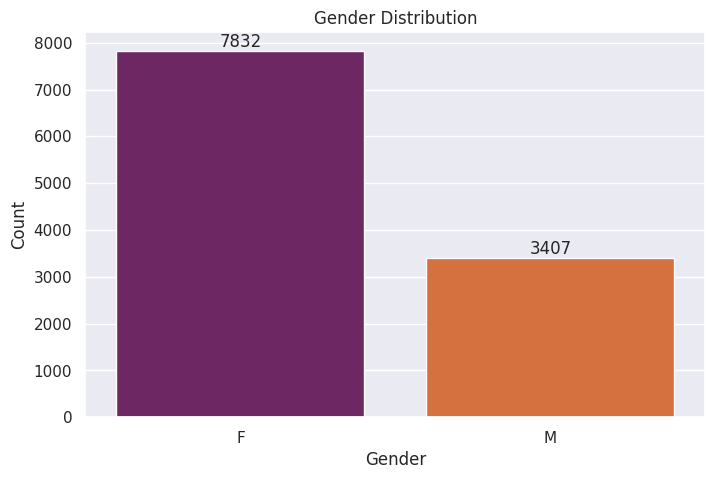

In [130]:
plt.figure(figsize = (8,5)  , dpi = 100)
bar = sns.countplot(x = 'Gender', data = df, palette = 'inferno')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
for bars in bar.containers:
  bar.bar_label(bars)

# **Age**

Text(0, 0.5, 'Count')

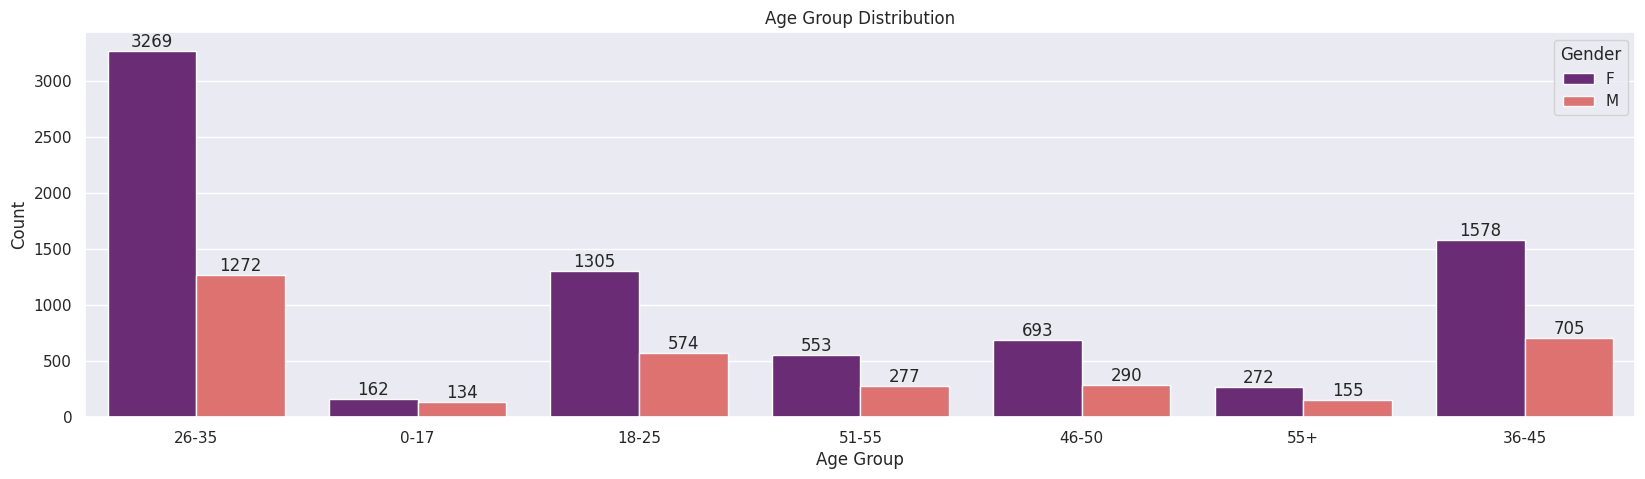

In [128]:
ageBar = sns.countplot(x = 'Age Group', data = df, hue = 'Gender', palette = 'magma')

#adding labels
for count in ageBar.containers:
  ageBar.bar_label(count)

#title and axes labels
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

Text(0.5, 1.0, 'Age_Group vs Amount spent')

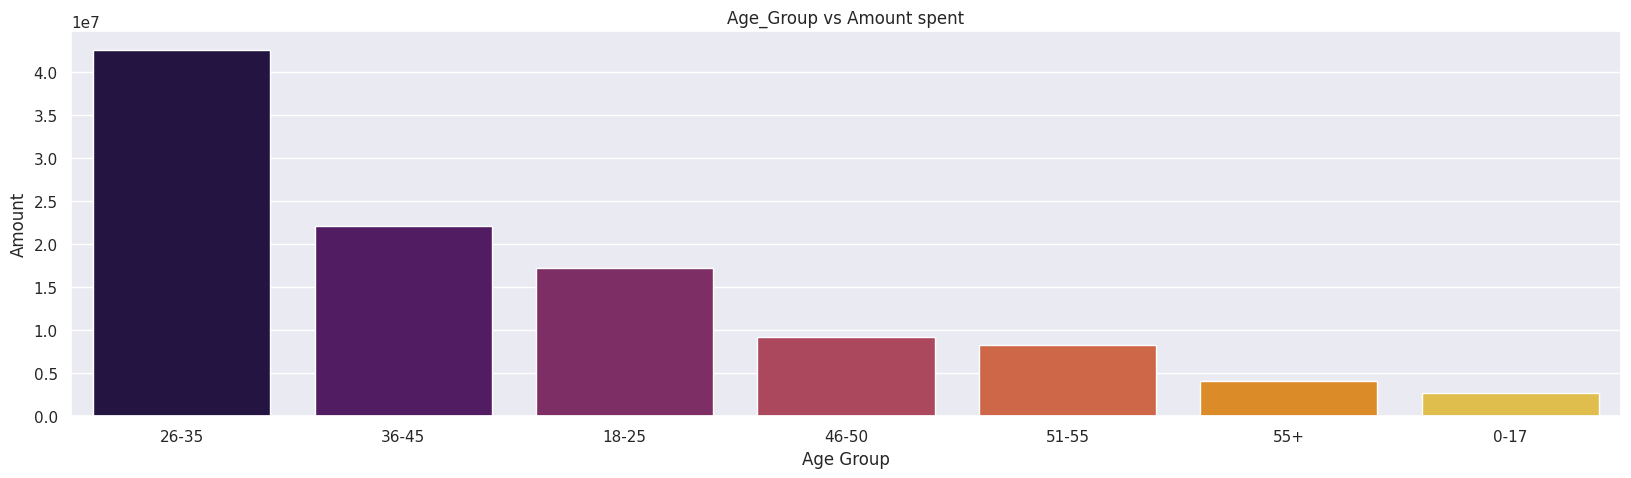

In [129]:
#Age_Group vs Amount spent
amount = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Age Group', y = 'Amount', data = amount, palette = 'inferno')
plt.title('Age_Group vs Amount spent')

# **State**

In [69]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

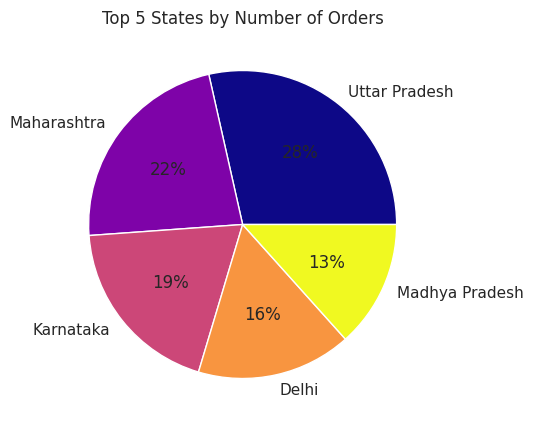

In [141]:
# Pie chart for State vs the number of orders and show the top 5 only

order_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(5)
plt.pie(order_state['Orders'], labels = order_state['State'], autopct = '%1d%%', colors = plt.cm.plasma(np.linspace(0,1,5)))
plt.get_cmap('plasma')
plt.title('Top 5 States by Number of Orders')
plt.show()

Text(0.5, 1.0, 'Top 10 states by Sales')

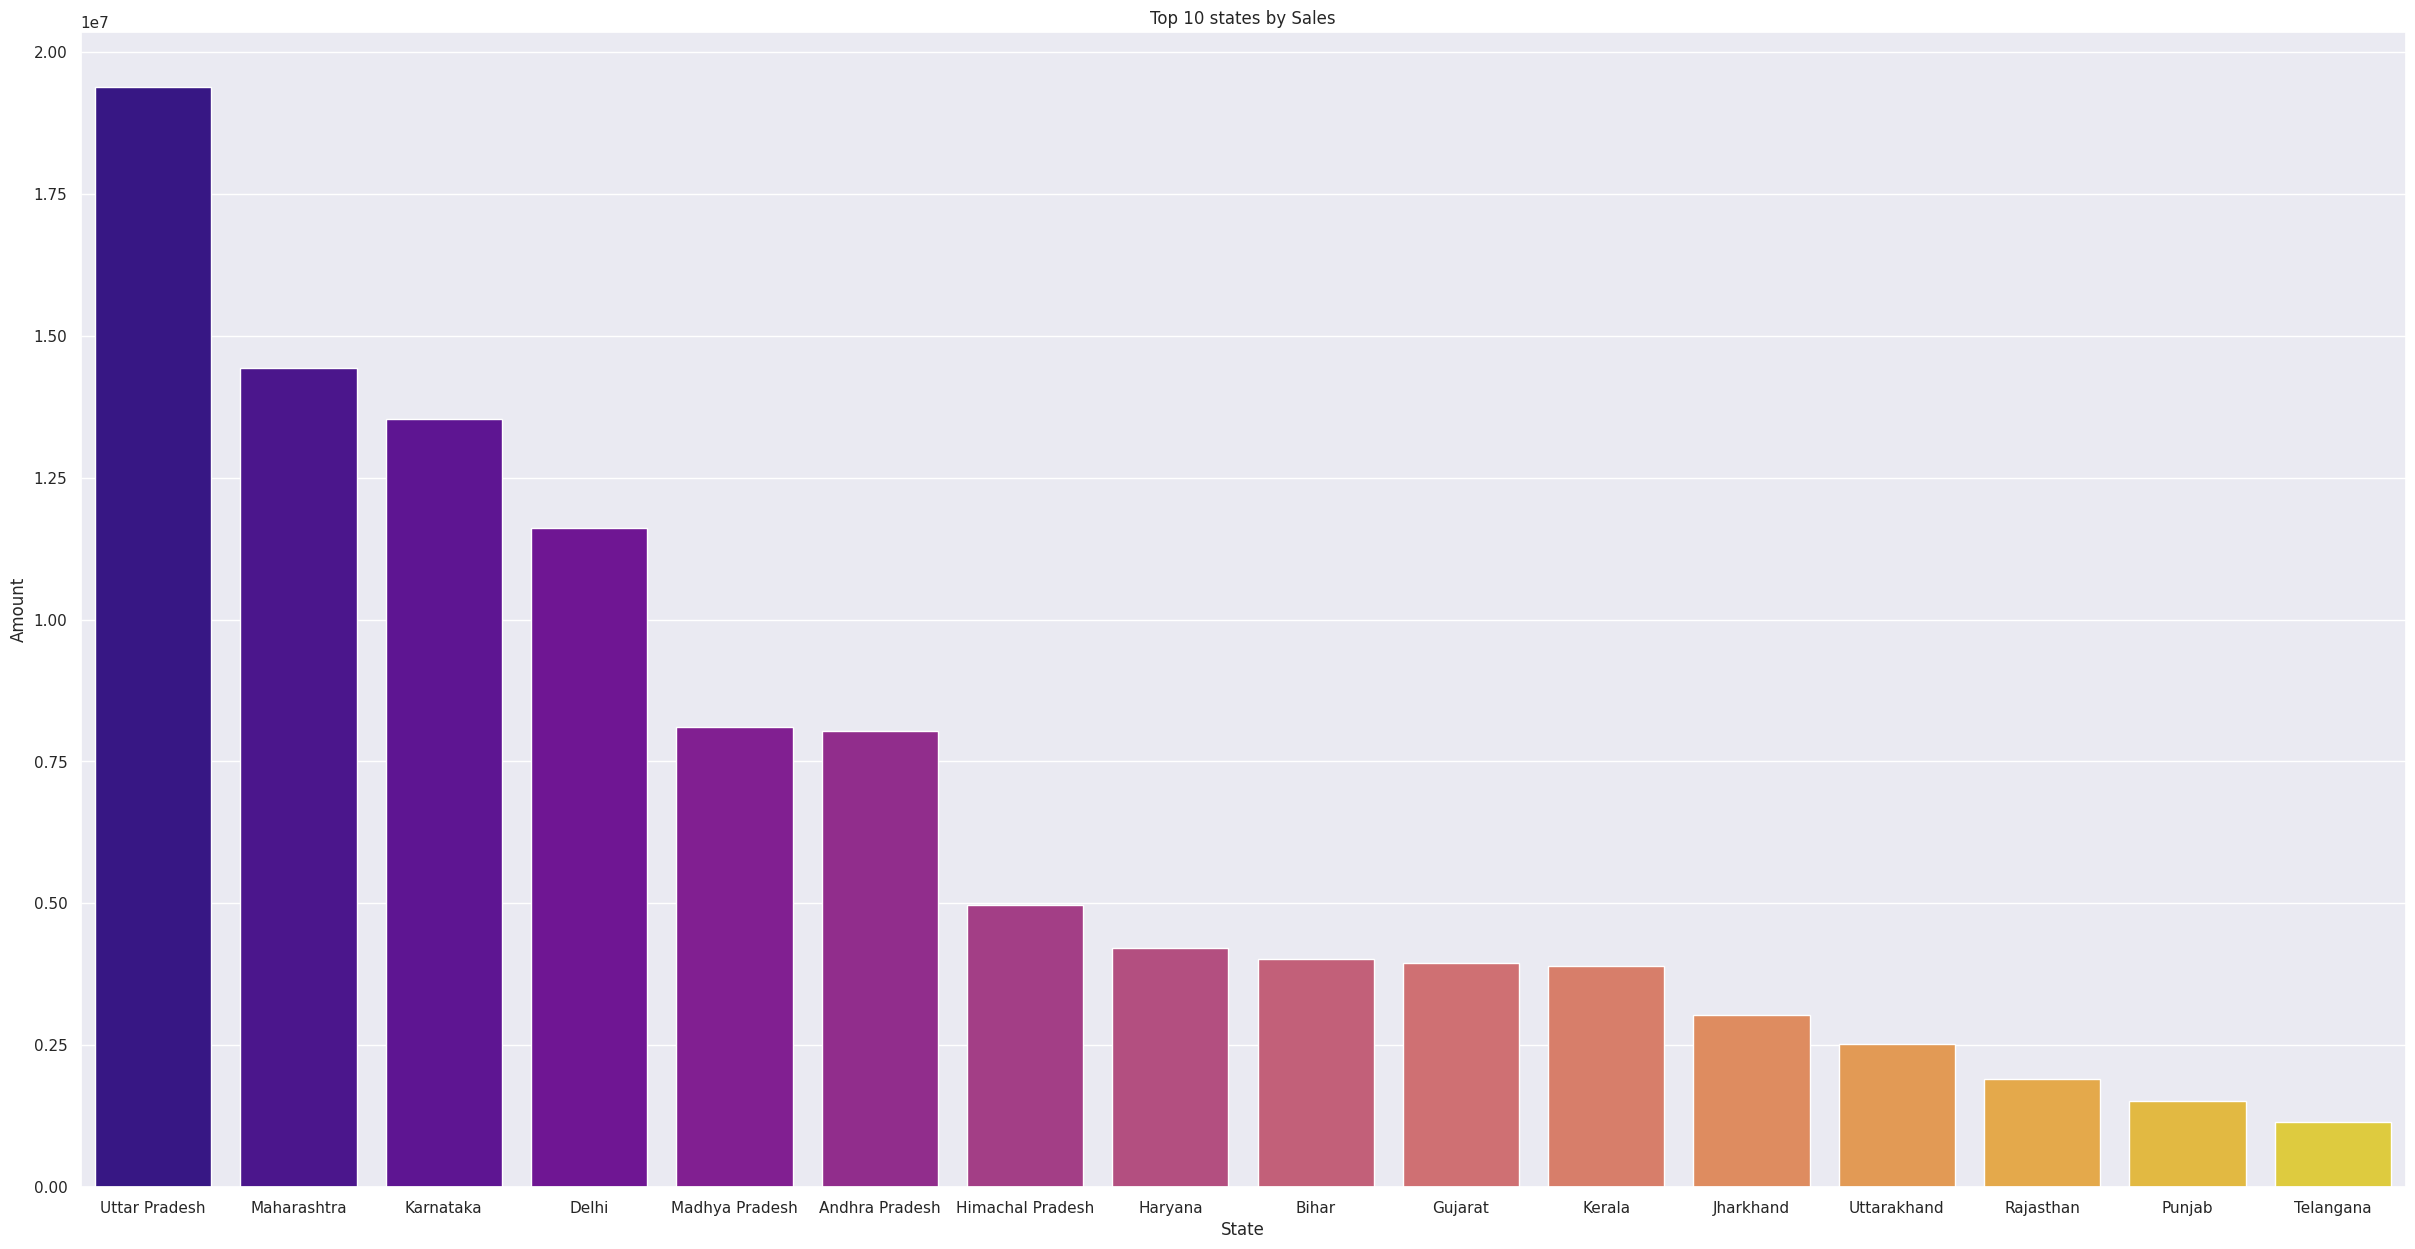

In [117]:
# Top 10 states by Sales
plt.figure(figsize = (30,15))
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'State', y = 'Amount', data = sales_state, palette = 'plasma')
plt.title('Top 10 states by Sales')

# Marital **Status**

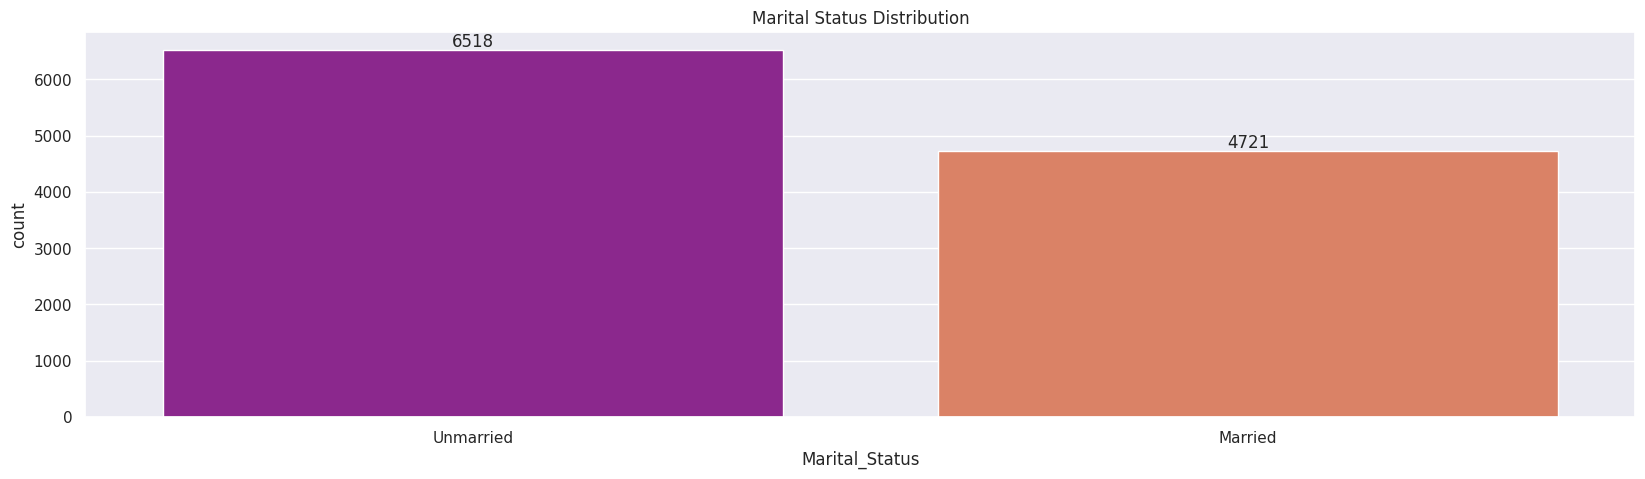

In [153]:
marraigeData = sns.countplot(x = 'Marital_Status', data = df, palette = 'plasma')
plt.title('Marital Status Distribution')
for cnt in marraigeData.containers:
  marraigeData.bar_label(cnt)

Text(0.5, 1.0, 'Amount Vs Marital Status')

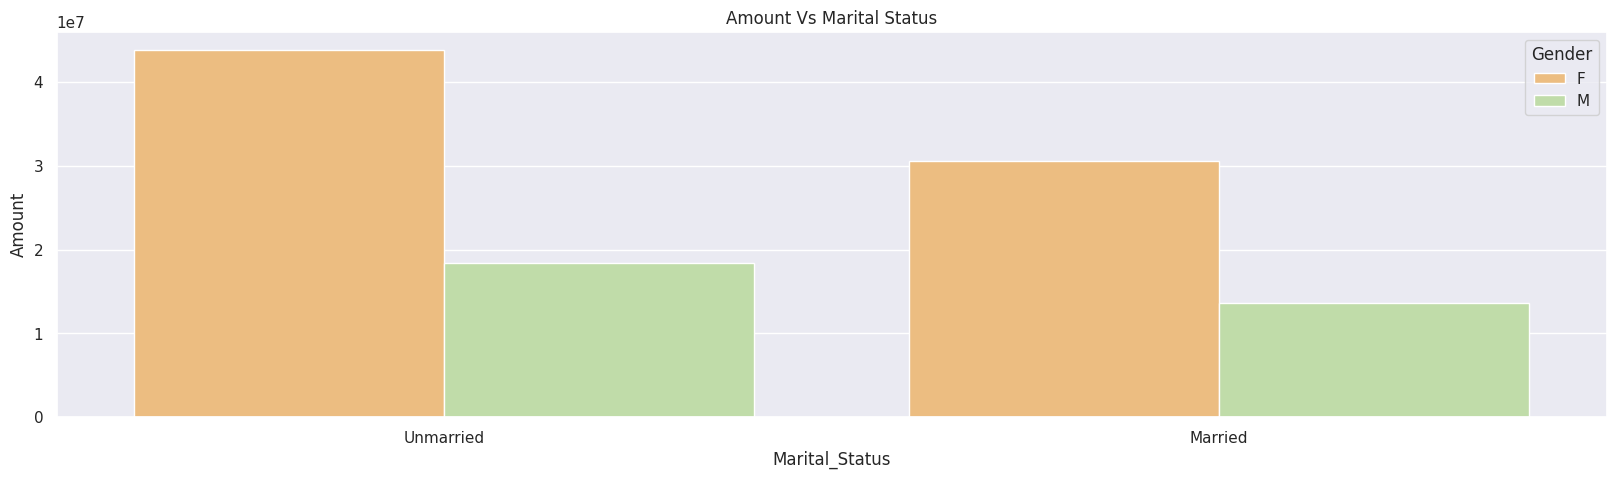

In [158]:
#Amount Vs Marital Status
ax = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Marital_Status', y = 'Amount', hue = 'Gender', data = ax, palette = 'Spectral')
plt.title('Amount Vs Marital Status')

# **Occupation**

Text(0.5, 1.0, 'Number of people in various profession')

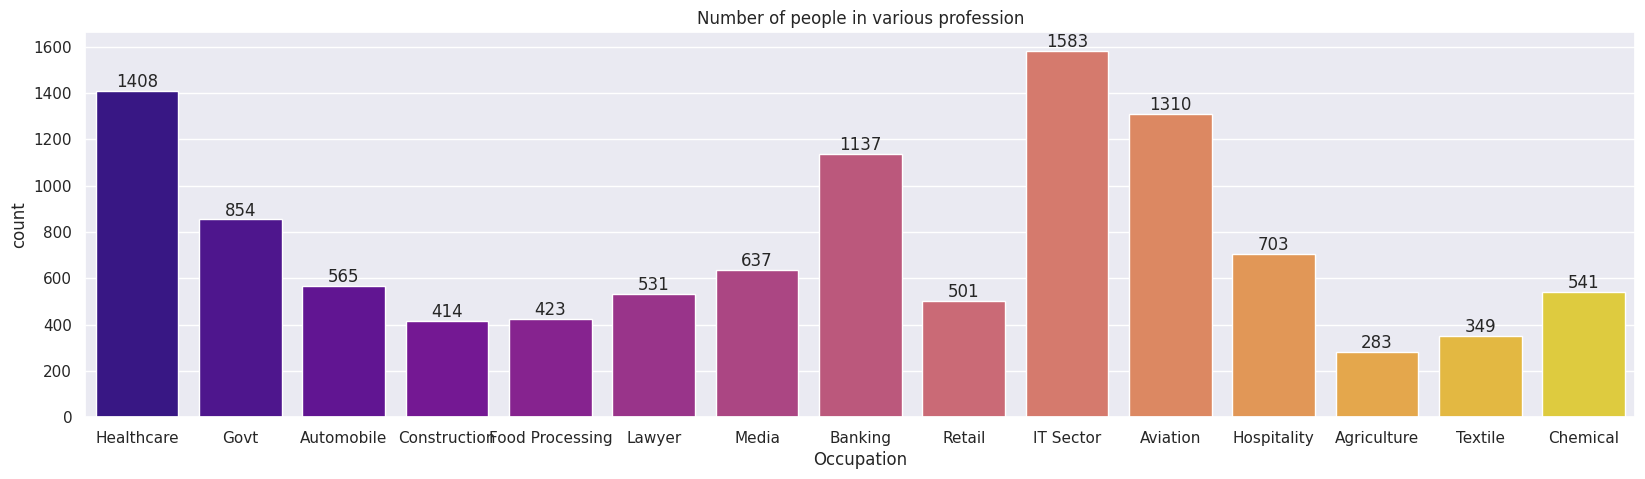

In [161]:
#Number of people in various profession
ax = sns.countplot(x = 'Occupation', data = df, palette = 'plasma')

for cnt in ax.containers:
  ax.bar_label(cnt)

plt.title('Number of people in various profession')

Text(0.5, 1.0, 'Amount Spent by people in various profession')

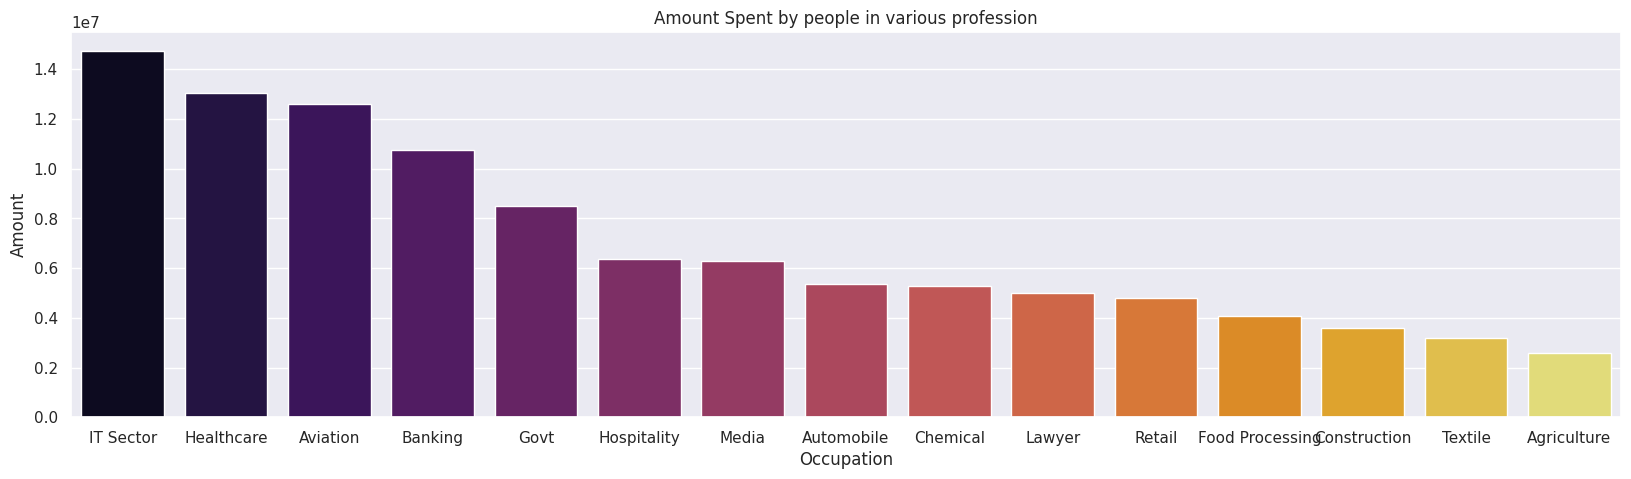

In [168]:
#Amount Spent by people in various profession
ay = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Occupation', y = 'Amount', data = ax, palette = 'inferno')
plt.title('Amount Spent by people in various profession')

# Product **Catagory**

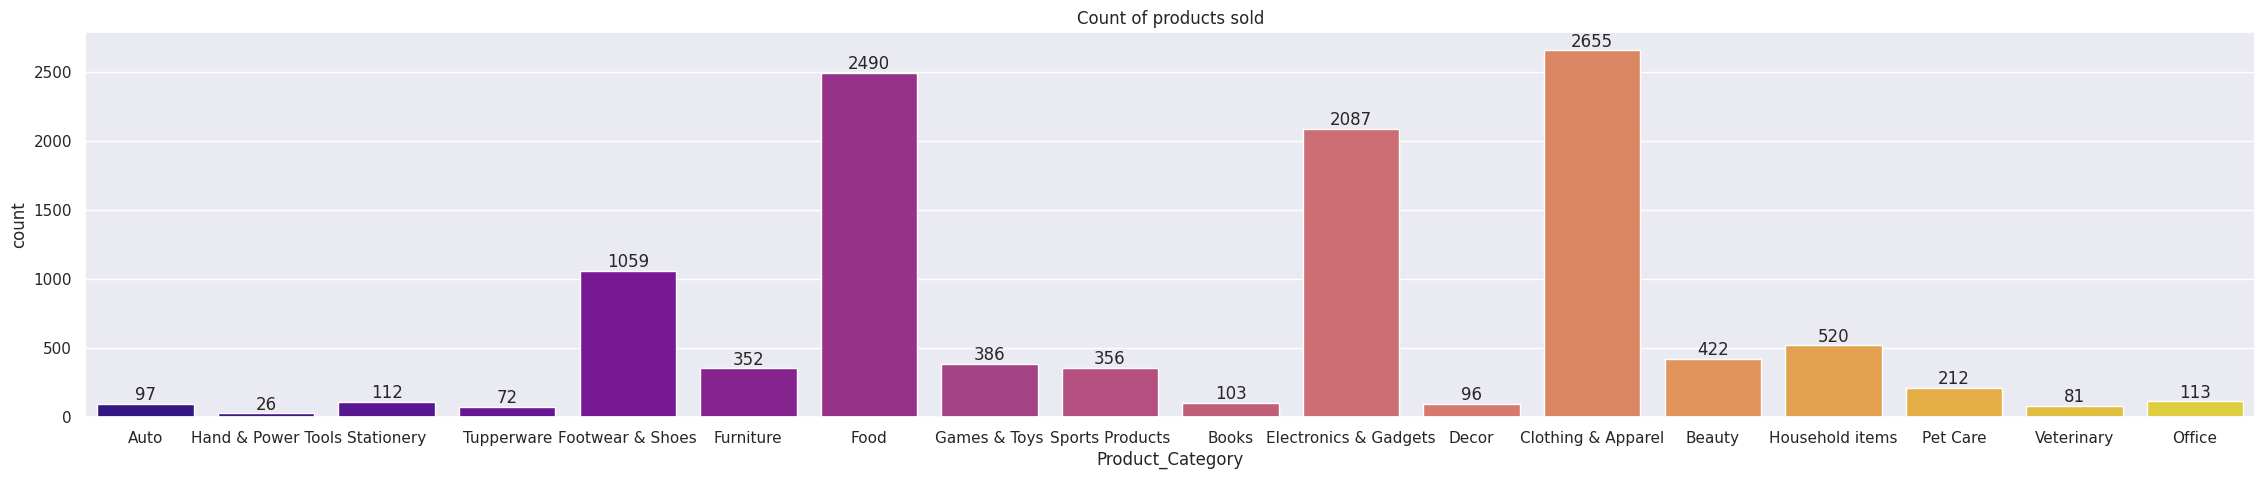

In [184]:
#Count of products sold
plt.figure(figsize = (28,5))
ax = sns.countplot(x = 'Product_Category', data = df, palette = 'plasma')
plt.title('Count of products sold')
for cnt in ax.containers:
  ax.bar_label(cnt)

Text(0.5, 1.0, 'Amount vs Occupation')

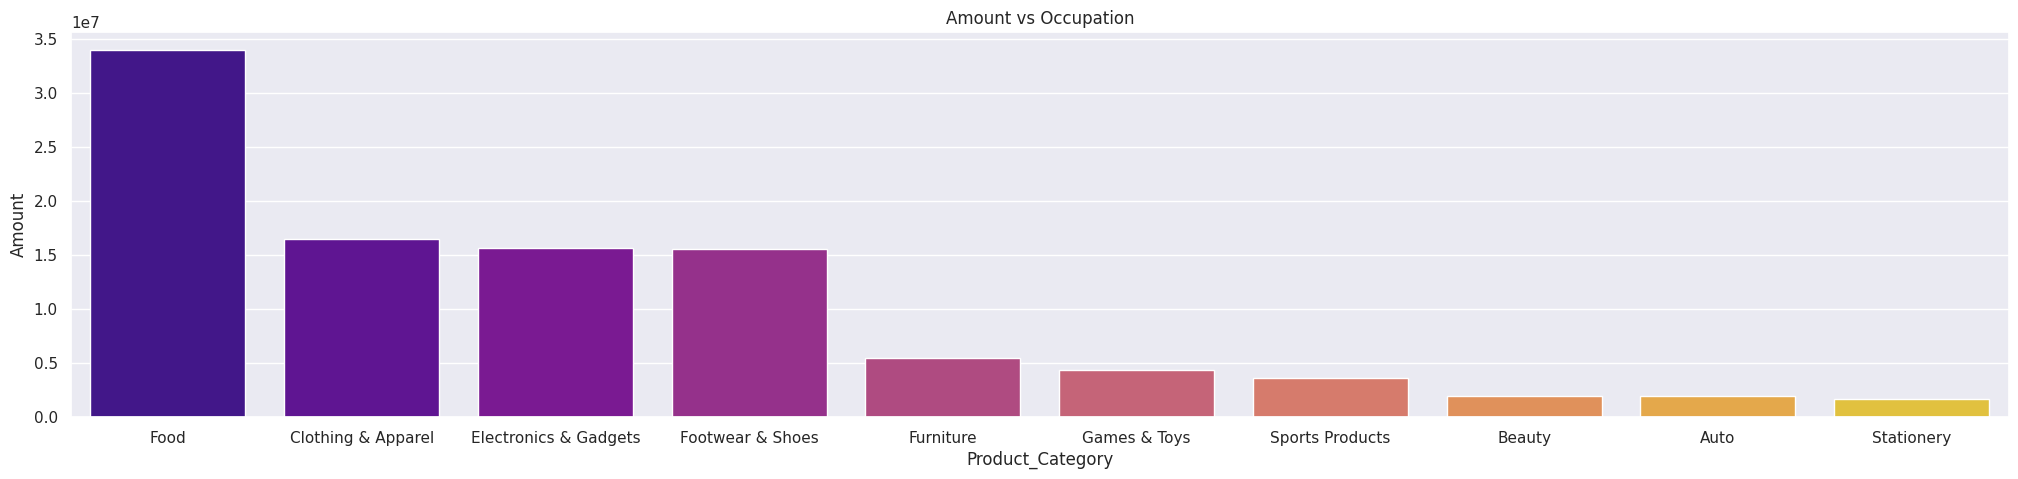

In [179]:
#Amount vs Occupation
plt.figure(figsize = (25,5))
ax = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.barplot(x = 'Product_Category', y = 'Amount', data = ax, palette = 'plasma')
plt.title('Amount vs Occupation')

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more
likely to buy products .